[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/warp_perspective.ipynb)

# Warp image using perspective transform

In this tutorial we are going to learn how to use the functions [kornia.get_perspective_transform](https://kornia.readthedocs.io/en/latest/geometry.transform.html#kornia.geometry.transform.get_perspective_transform) and [kornia.warp_perspective](https://kornia.readthedocs.io/en/latest/geometry.transform.html#kornia.geometry.transform.warp_perspective).

## Install libraries and get the data

In [1]:
%%capture
!pip install kornia

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/bruce.png

## Import libraries and load the data

In [7]:
import torch
import kornia as K

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
img_bgr: np.ndarray = cv2.imread('bruce.png')  # HxWxC / np.uint8

img: torch.tensor = K.image_to_tensor(img_bgr, keepdim=False)  # 1xCxHxW / torch.uint8
img = K.bgr_to_rgb(img)
print(img.shape)

torch.Size([1, 3, 372, 600])


## Define the points to warp, compute the homography and warp

In [19]:
# the source points are the region to crop corners
points_src = torch.tensor([[
    [125., 150.], [562., 40.], [562., 282.], [54., 328.],
]])

# the destination points are the image vertexes
h, w = 64, 128  # destination size
points_dst = torch.tensor([[
    [0., 0.], [w - 1., 0.], [w - 1., h - 1.], [0., h - 1.],
]])

# compute perspective transform
M: torch.tensor = K.get_perspective_transform(points_src, points_dst)

# warp the original image by the found transform
img_warp: torch.tensor = K.warp_perspective(img.float(), M, dsize=(h, w))
print(img_warp.shape)

torch.Size([1, 3, 64, 128])


/usr/local/lib/python3.7/dist-packages/kornia/geometry/transform/imgwarp.py:98: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpPerspective. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)


## Plot the warped data

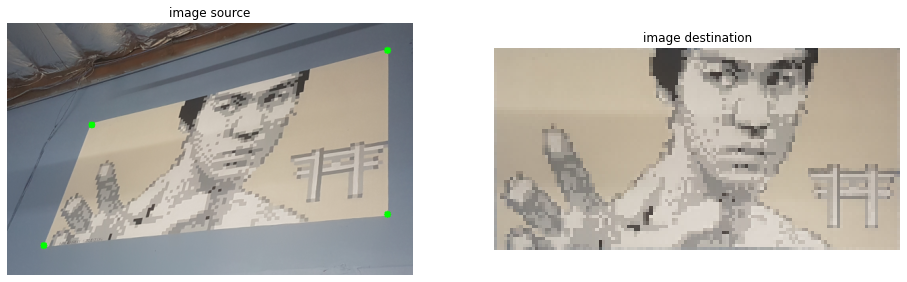

In [20]:
# convert back to numpy
img_np = K.tensor_to_image(img.byte())
img_warp_np: np.ndarray = K.tensor_to_image(img_warp.byte())

# draw points into original image
for i in range(4):
    center = tuple(points_src[0, i].long().numpy())
    img_np = cv2.circle(img_np.copy(), center, 5, (0, 255, 0), -1)

# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img_np)

axs[1].axis('off')
axs[1].set_title('image destination')
axs[1].imshow(img_warp_np)